<a href="https://colab.research.google.com/github/alexdel1/graph_csv_to_svg/blob/main/RepresentationGroupesAbeliens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 [![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)
[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)
[![made-with-Markdown](https://img.shields.io/badge/Made%20with-Markdown-1f425f.svg)](http://commonmark.org)
[![made-with-mathjax](https://img.shields.io/badge/Made%20with-MathJax-1f425f.svg)](https://www.mathjax.org/)
[![GitHub](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com/alexdel1/TestPresentation/)
<a href="https://colab.research.google.com/github/alexdel1/TestPresentation/blob/main/RepresentationGroupesAbeliens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>  
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/alexdel1/TestPresentation/HEAD)  
[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/alexdel1/TestPresentation/blob/main/RepresentationGroupesAbeliens.ipynb)



Rappel : Menu View : \
Toggle zen mode (not available im jupyter lab)\
: Appearance :\
Table of Contents (tick numbered AND untick first header) \
only simple interface

Menu Settings : Jupyter dark

Test regularly on Binder-JupyterLab-Zoom \
Make a back-up pdf(slide) and html

**create** a **vm** with binder and edit from github dev...
%%load ...notebook pour avoir accès à deux notebook en même temps (équivalent à un import de github)

In [ ]:
!jupyter server list

Currently running servers:


In [ ]:
!jupyter server list | grep -oP 'token=\K[^ ]+'

In [ ]:

import os
print(os.environ.get('COLAB_RELEASE_TAG', 'Not in Colab'))

release-colab_20241125-104948_RC00


empty cell to drag the output to get the token for zoom

Nom : Alexandre Delode \
Date : 05/12/2024 \
Module : Séminaire ( AMU M1 Mathématiques EADS ) \
Prof. : Puschnigg \
Réf : B. Steinberg, Representation theory of finite groups

##### Macros Latex et Bibliothèques Python


**Macros Latex:**

$
\def\GL{\mathbb{GL}}
\def\RR{\mathbb{R}}
\def\ZZ{\mathbb{Z}}
$

```latex
$
\def\GL{\mathbb{GL}}
\def\RR{\mathbb{R}}
\def\ZZ{\mathbb{Z}}
$
```

Test: Maintenant $\GL(n, \RR)$ fonctionne directement dans le markdown.

In [ ]:

%%capture
!pip install git+https://github.com/alexdel1/graph_csv_to_svg.git
!sudo apt update
!sudo apt install graphviz libgraphviz-dev
!pip install pygraphviz
!pip install dot2tex
!sudo apt install pdf2svg
!sudo apt update
!sudo apt install texlive-xetex

In [ ]:

import pandas as pd
import io
import unicodedata
import re
import networkx as nx
import pygraphviz # Import the Graph class
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import SVG
import subprocess


from graph_csv_to_svg import csv_to_svg

# **Représentation des groupes abéliens** <!-- omit in toc -->

## Rappel groupe abélien fini

### Définition

#### Groupe

Un ensemble et une loi de composition interne (LCI) :
* un symétrique pour chaque élément
* associative
* un élément neutre

#### Abélien


$$ x \cdot y = y \cdot x \,\,\,\,\, \forall x, y \in G $$

#### Fini

$$\mathrm{card}(G)<\infty$$

<details>
<summary>À ne pas confondre avec de "type fini"</summary>

$$\forall x \in G, \, \exists x_1, x_2, \dots, x_s \in G \text{ et } \exists n_1, n_2, \dots, n_s \in \mathbb{Z} \text{ tel que } x = n_1 x_1 + n_2 x_2 + \cdots + n_s x_s$$
où $ s $ est un nombre fini fixé.


Une autre définition équivalente est que le rang défini ci-dessous doit être fini :

$$\mathrm{rang}(G) = \min \left( |X| \mid \langle X \rangle = G\right) $$
</details>

### Exemples

Si $G$ est un groupe abélien et $\sim$ est compatible, alors $G /\sim$ est aussi abélien.

Un groupe cyclique est un groupe qui est à la fois fini et monogène.

Tout groupe cyclique est abélien. (Ex : $\ZZ / n \ZZ$)

Tout sous-groupe d'un groupe abélien fini est abélien et fini.

Tout produit direct d'une famille finie de groupes abéliens finis est un groupe abélien fini.

### Contre exemples

Le groupe linéaire général $\left( \mathbb{GL}(n, K)  \right)$, constitué des matrices inversibles $\left( n \times n \right)$ à coefficients dans un corps \( K \), **n'est pas abélien** pour \( n > 1 \). \

### Théorème de structure des groupes abéliens finis

## Rappel de la théorie de la représentation des groupes

Alternative to github for dev:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

%run "/content/drive/MyDrive/Colab Notebooks/csv_to_svg_c.ipynb"

In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/csv_to_svg_c.ipynb"

here 1                   texlbl                  name
0               éq. déc.              éq. déc.
1               éq. irr.              éq. irr.
2         éq. comp. réd.        éq. comp. réd.
3                  unit.                 unit.
4              éq. unit.             éq. unit.
5   éq. irr. ou éq. déc.  éq. irr. ou éq. déc.
7                   fini                  fini
9          irr. ou déc.1         irr. ou déc.1
11         irr. ou déc.2         irr. ou déc.2
13                  irr.                  irr.
0                   déc.                  déc.
2             comp. réd.            comp. réd.
13                indéc.                indéc.
                   name                     texlbl    shape
0                  fini  $\mathrm{card}(G)<\infty$      NaN
1         irr. ou déc.1              $\mathrm{ou}$  diamond
2  éq. irr. ou éq. déc.              $\mathrm{ou}$  diamond
3         irr. ou déc.2              $\mathrm{ou}$  diamond
                  texlbl           

<ipython-input-8-a842965f38b5>:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'solid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  C.fillna("solid", inplace=True)


ipynb version


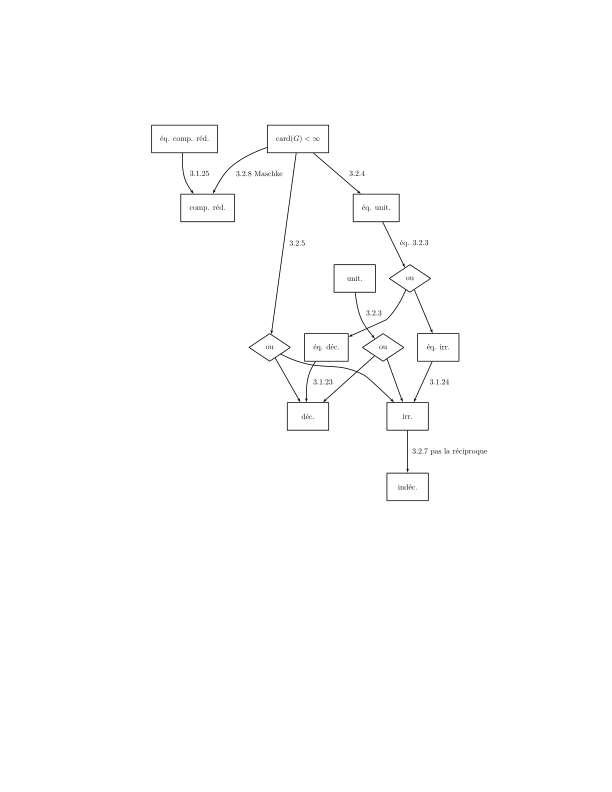

In [21]:
# Parse the CSV data
csv_data = r"""source,target,label,style
éq. déc.,déc.,3.1.23
éq. irr.,irr.,3.1.24
éq. comp. réd.,comp. réd.,3.1.25
unit.,irr. ou déc.2,3.2.3
éq. unit.,éq. irr. ou éq. déc.,éq. 3.2.3
éq. irr. ou éq. déc.,éq. irr.,
éq. irr. ou éq. déc.,éq. déc.,
fini,éq. unit.,3.2.4
fini,irr. ou déc.1,3.2.5
irr. ou déc.1,irr., ,
irr. ou déc.1,déc., ,
irr. ou déc.2,irr., ,
irr. ou déc.2,déc., ,
irr.,indéc.,3.2.7 pas la réciproque
fini,comp. réd.,3.2.8 Maschke
"""
csv_node=r"""name,texlbl,shape
fini,$\mathrm{card}(G)<\infty$
irr. ou déc.1,$\mathrm{ou}$,diamond
éq. irr. ou éq. déc.,$\mathrm{ou}$,diamond
irr. ou déc.2,$\mathrm{ou}$,diamond
"""

csv_to_svg(csv_data,csv_node,"testou")

## Théorème de représentation des groupes abéliens finis

## Applications en mathématiques

Voir exos steinberg et agreg

## Applications dans d'autres domaines

### Statistique

### Physique

### Économie

### Ingénieurie

### Cybersécurité

### Automatique